In [205]:
# import all modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [843]:
# load data

df_linear_SSP1 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubic = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubic.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubicroot = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubicroot.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_LI = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_LI_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_LIRE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_LIRE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP1_RE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP1_RE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_DAC = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_DAC_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_LI = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_LI_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_LIRE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_LIRE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear_SSP2_RE = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_linear/SSP2_RE_costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

# df_linear_SSP1.describe()

df_cubic[1][403+202]

2050.0

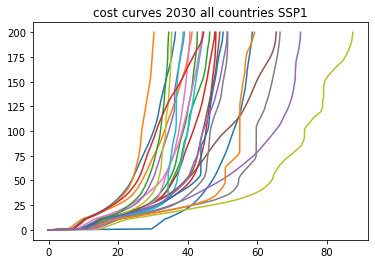

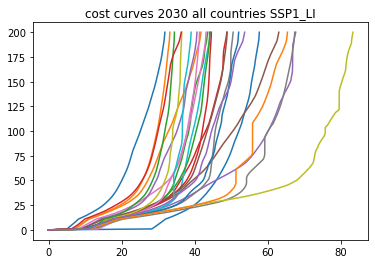

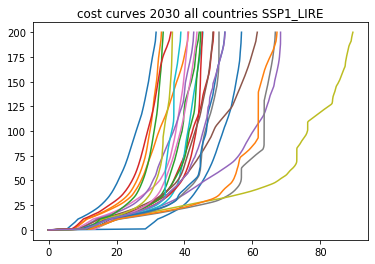

In [844]:
# plot data to visualise

def plot_curves(df, plot_title):
    
    year_index = []
    start_year = 2020
    num_costs = 202

    for i in range (10, 90, 10):

        cur_year = start_year + i

        cur_index = df.index[df_linear_SSP1[1] == cur_year].tolist()

#         print(cur_index[0])

        year_index.append(cur_index[0])

    df_2030 = df[year_index[0]+1:year_index[1]]
    
    df_2030 = pd.DataFrame(df_2030)

    fig, ax = plt.subplots()

    for i in range(1, len(df.columns)):

        ax.plot(df_2030[i], range(0,201))

    ax.set(title='cost curves 2030 all countries ' + plot_title)
    
    
plot_curves(df_linear_SSP1, 'SSP1')
plot_curves(df_linear_SSP1_LI, 'SSP1_LI')
plot_curves(df_linear_SSP1_LIRE, 'SSP1_LIRE')

1211
1413
1413
1615
1211
1413
403
605


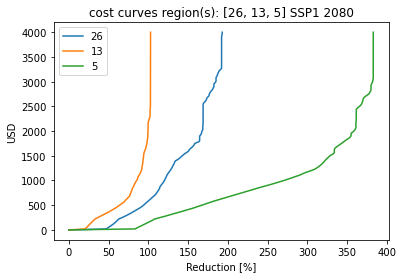

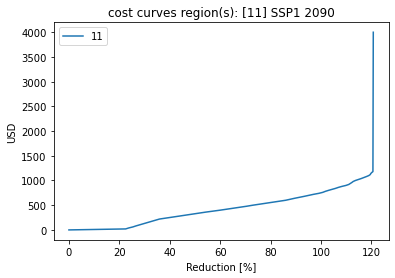

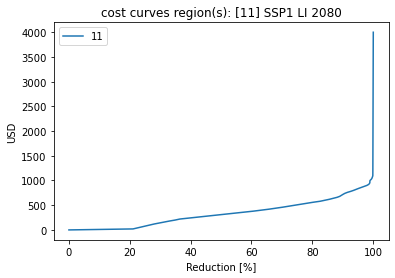

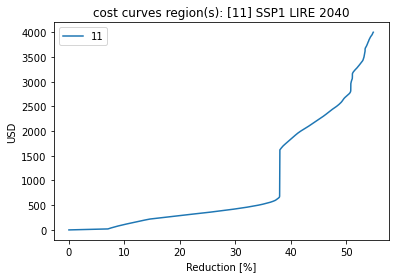

In [845]:
# df is the dataframe to be used (cubic, cubicroot, linear)
# plot_title, the title name (string)
# year which year should be plotted (int)
# regions is list like input ranging from 1:26 (int, list)

def plot_curves_year(df, plot_title, year, regions):
    
    year_index = []
    start_year = 2020
    
    cur_index = []
    
    for i in range(0, 20, 10):
    
    # old method
    
#         cur_index = df.index[df_linear_SSP1[1] == year + i].tolist()
        
# #         print(df.index[df_cubic[1] == year])

#         x = (year - start_year)/10 * 202

#         print(cur_index)

#         year_index.append(cur_index[0])
    
    # new method
        
        cur_index = df.index[int(((year + i) - start_year)/10 * 202 - 1)]
    
        print(cur_index)

        year_index.append(cur_index)
            
    df_cur = df[year_index[0]+1:year_index[1]]
    
    df_cur = df_cur[regions]
    
    df_cur = pd.DataFrame(df_cur)

    fig, ax = plt.subplots()

    ax.plot(df_cur, range(0,4020,20))

    ax.set(title='cost curves region(s): ' + str(regions).strip() + ' ' + plot_title + ' ' + str(year))
    
    ax.set_ylabel('USD')
    
    ax.set_xlabel('Reduction [%]')
    
    ax.legend(df_cur.columns)
    
    return df_cur
    
df_2040 = plot_curves_year(df_linear_SSP1, 'SSP1', 2080, [26,13,5])

df_11_SSP1 = plot_curves_year(df_linear_SSP1, 'SSP1', 2090, [11])
df_11_SSP1_LI = plot_curves_year(df_linear_SSP1_LI, 'SSP1 LI', 2080, [11])
df_11_SSP1_LIRE = plot_curves_year(df_linear_SSP1_LIRE, 'SSP1 LIRE', 2040, [11])

df_11_SSP1.to_csv('C:/Users/toonv/Documents/PBL/Code/CSV/SSP1_11.csv')

In [846]:
# so now we want to see a specific reduction given a certain cost.

In [847]:
# generate random reduction figure

"""
This function calculates the average reduction for a random cost input. It takes into account 
the scenarios that are given as input and calculates the average between these different outputs.
This will help to built other tools which can use this data to define other curves.
"""

def scenario_df(dfs, columns, year, region):   
    
    rand_cost = np.random.randint(0, 4000, size=1)

    if year < 2020 or year > 2100:
        raise Exception("Only years ranging from 2020 to 2100 in timesteps of 10")
        
    if region < 1 or region > 26:
        raise Exception("Only regions ranging from 1 to 26")
    
    # empty df
    
    index = list(range(0,4020,20))

    all_scenarios = pd.DataFrame(columns=columns, index=index)
        
    column_index = 0
    
    for df in dfs:

        df.head()
        
        # first calculate the costs (0~4000) for the given period
    
        year_index = []
        start_year = 2020
        steps_new_year = 202 # until new year in df

#         print(scenario[1])
        
        for i in range(0, 20, 10):
                
            # OLD
            
#             cur_index = df.index[scenario[1] == year + i].tolist()
                
#             print(cur_index)
        
#             year_index.append(cur_index[0])

            # NEW
            
            cur_index = df.index[int(((year + i) - start_year)/10 * steps_new_year - 1)]
    
            year_index.append(cur_index)

        df_cur = df[year_index[0]+1:year_index[1]]

        df_cur = df_cur[region]

        df_cur = pd.DataFrame(df_cur)
        

        #  set index to USD (0:4000)
        
        df_cur['USD'] = index
        
        df_cur.set_index('USD', inplace=True, drop=True)
        
        df_cur.columns = ['Reduction [%]']
        

        #  append values of current timestep to total dataframe
                
        all_scenarios[columns[column_index]] = df_cur['Reduction [%]']
        
        column_index = column_index + 1
            
    output_data = all_scenarios

    # find reduction which is closest to random cost
    
#     print(rand_cost)
    
    # value closest to random cost
    closest_value = min(index, key=lambda x:abs(x-rand_cost))
    
    # empty list for all reductions closest to random
    
    reductions = []
    
    for column in columns:
        
        reductions.append(all_scenarios[column][closest_value])
            
    avg_reduction = np.average(reductions)
    
#     print('Average reduction: ', avg_reduction)
    
    return output_data
    


In [848]:
"""
Wat we willen is de paden afleiden uit een MAC dataset. We beginnen met linear en gaan van 1 regio, alle linear 
paden afleiden. Zo maken we een dataset met alle linear paden voor een tijdsperiode 20 jaar voor een regio. 
Aan de hand van deze dataset gaan we kijken of we de reductie kunnen bepalen aan de hand van een set aan linear paden.

Wat ik niet precies begrijp is hoe we die paden nog gaan aanpassen. dat is uiteindelijk het doel, om van de linear, 
cubic en cubicroot paden af te stappen

~~~~
Here we calculate the linear carbon tax paths for the given MAC responce curves.
~~~~

"""

# dus eerst gaan we de linear paden uit de MAC curves genereren

def find_linear_path(df, step_columns):
    
    #empty dataframe for all linear paths
    
    df_reduction = pd.DataFrame(columns = ['reduction'])
        
#     print(linear_paths)
    
    columns = df.columns.values
    
    linear_path = []
        
    # make sure columns are same length as given num in linspace
    
    years = 20
        
    df_columns = []
    
    for i in range(0, years, step_columns):
                
        df_columns.append(i)
        
        if i == years - step_columns:
            
            df_columns.append(years)
       
    for column in columns:
            
        for index in df.index.values:
            
            reduction = df[column][index]
                                    
            df_reduction.loc[index, 'reduction'] = reduction
            
            num = len(df_columns)
            
            linear_path.append(np.linspace(0, index, num=num))
    
#     pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

#     print(linear_path)
    
    df_paths = pd.DataFrame(linear_path, columns=df_columns)
        
    # combine dataframes
    df = pd.concat([df_paths.reset_index(drop=True),df_reduction.reset_index(drop=True)], axis=1)   

    # set index to 0-4000
    index = list(range(0,4020,20))

    df['USD'] = index
        
    df.set_index('USD', inplace=True, drop=True)
    
    return df

"""
Calculate the ctax paths from the repsonse curve

    Input
    ----------
    pandas dataframe, number of steps taken (0 to 20)
    and define the path (string) linear, cubic, cubicroot
    
    Output
    -------
    ctax paths pandas df
    
"""

def find_path(df, step_columns, path):

    possible_paths = ['linear', 'cubic', 'cubicroot']
        
    if path not in possible_paths:
        
         raise Exception("given path not one of linear, cubic or cubicroot")
    
    if path == 'linear':
        num_path = 1
    elif path == 'cubic':
        num_path = 2
    elif path == 'cubicroot':
        num_path = 3
        
    #empty dataframe for all cubic paths
    
    df_reduction = pd.DataFrame(columns = ['reduction'])
        
#     print(linear_paths)
    
    columns = df.columns.values
    
    path = []
        
    # make sure columns are same length as given step_columns
    
    years = 20
        
    df_columns = []
    
    for i in range(0, years, step_columns):
                
        df_columns.append(i)
        
        if i == years - step_columns:
            
            df_columns.append(years)
       
    for column in columns:
            
        for index in df.index.values:
                        
            reduction = df[column][index]
                                                
            df_reduction.loc[index, 'reduction'] = reduction
            
            num = len(df_columns)
            
            # calculate path (1,2 and 3 and append the paths to list)
            
            if num_path == 1:
                            
                path.append(np.linspace(0, index, num=num))
            
            if num_path == 2:
                
                # find a in y = ax^3
                
                a = (index/(years**(3)))

                price_path = []

                for steps in range(0, num):

                    price = a * ((steps * num) / 5.5)**3
                    
                    price_path.append(price)

                path.append(price_path)
                
            else:
                                
                # find a in y = ax^(1/3)
                
                a = (index/(years**(1/3)))

                price_path = []

                for steps in range(0, num):

                    price = a * ((steps * num) / 5.5)**(1/3)

                    price_path.append(price)

                path.append(price_path)       
                
    # convert to pandas dataframe        
    df_paths = pd.DataFrame(path, columns=df_columns)
        
    # combine dataframes
    df = pd.concat([df_paths.reset_index(drop=True),df_reduction.reset_index(drop=True)], axis=1)   

    # set index to 0-4000
    index = list(range(0,4020,20))

    df['USD'] = index
        
    df.set_index('USD', inplace=True, drop=True)
    
    return df 


In [928]:
"""
Call functions and add to CSV
"""

if __name__ == "__main__":

    df_1 = scenario_df([df_linear_SSP1], ['SSP1'], 2040, 11)
    df_2 = scenario_df([df_linear_SSP1], ['SSP1'], 2050, 11)
    
    df_cubic_1 = scenario_df([df_cubic], ['SSP1'], 2040, 11)
    df_cubicroot_1 = scenario_df([df_cubicroot], ['SSP1'], 2040, 11)
    
    
    df_cubic_path = find_path(df_cubic_1, 2, 'cubic')
    df_cubicroot_path = find_path(df_cubic_1, 2, 'cubicroot')

    df_linear_SSP1_paths = find_linear_path(df_1, 2)
    df_linear_SSP1_paths_2050 = find_linear_path(df_2, 2)

    # maybe add functionality that df is made with year and scenario in name
    df_linear_SSP1_paths.to_csv('C:/Users/toonv/Documents/PBL/Data/linear paths/linear_SSP1_11_2040.csv')
    df_linear_SSP1_paths_2050.to_csv('C:/Users/toonv/Documents/PBL/Data/linear paths/linear_SSP1_11_2050.csv')

2
3


USD,0,20,40,60,80,100,120,140,160,180,...,3820,3840,3860,3880,3900,3920,3940,3960,3980,4000
12,0.0,4.32,8.64,12.96,17.28,21.6,25.92,30.24,34.56,38.88,...,825.12,829.44,833.76,838.08,842.4,846.72,851.04,855.36,859.68,864.0
14,0.0,6.86,13.72,20.58,27.44,34.3,41.16,48.02,54.88,61.74,...,1310.26,1317.12,1323.98,1330.84,1337.7,1344.56,1351.42,1358.28,1365.14,1372.0
16,0.0,10.24,20.48,30.72,40.96,51.2,61.44,71.68,81.92,92.16,...,1955.84,1966.08,1976.32,1986.56,1996.8,2007.04,2017.28,2027.52,2037.76,2048.0
18,0.0,14.58,29.16,43.74,58.32,72.9,87.48,102.06,116.64,131.22,...,2784.78,2799.36,2813.94,2828.52,2843.1,2857.68,2872.26,2886.84,2901.42,2916.0
20,0.0,20.00,40.00,60.00,80.00,100.0,120.00,140.00,160.00,180.00,...,3820.00,3840.00,3860.00,3880.00,3900.0,3920.00,3940.00,3960.00,3980.00,4000.0


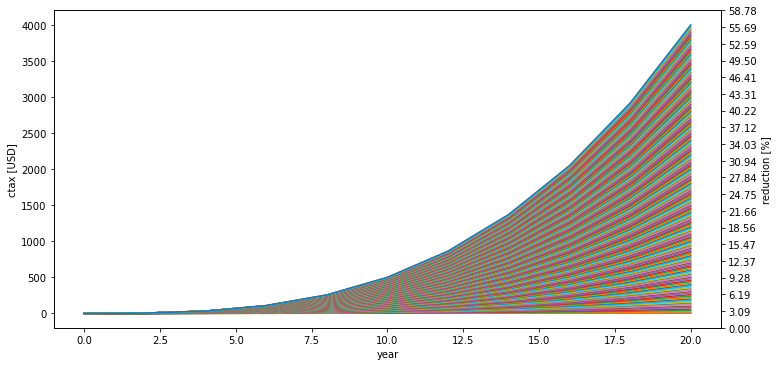

In [927]:
# plot the paths

df_cubic_path_wo_reduction = df_cubic_path.drop('reduction', axis = 1)

df_transposed = df_cubic_path_wo_reduction.T

fig, ax1 = plt.subplots(figsize=(10, 5))

fig.tight_layout()

ax1.plot(df_transposed.index, df_transposed.values)

ax1.set_xlabel('year')
ax1.set_ylabel('ctax [USD]')
# ax1.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax2 = ax1.twinx()
# ax2.plot(df_cubic_path['reduction'])

y2 = df_cubic_path['reduction'].values

y2 = [ round(elem, 2) for elem in y2 ]

y3 = np.linspace(min(y2), max(y2), 20)

y3 = [ round(elem, 2) for elem in y3 ]

ax2.set_yticks(y3)
ax2.set_ylabel('reduction [%]')

df_transposed.tail()

In [560]:
df_linear_SSP1_paths.head()

,0,2,4,6,8,10,12,14,16,18,20,reduction
USD,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,9.163
40,0.0,4.0,8.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,9.7058
60,0.0,6.0,12.0,18.0,24.0,30.0,36.0,42.0,48.0,54.0,60.0,10.2579
80,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,80.0,10.8145


In [400]:
"""
Now that we have a dataframe with the paths, we can start do train a model!!!
"""

import xgboost as xgb
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

In [411]:
train_dataset = find_linear_path(df_1,2)
test_dataset = find_linear_path(df_1,2)

train_dataset.describe()

# train_dataset[every_column_except_y] = np.log1p(train_dataset[every_column_except_y])

# test_dataset[every_column_except_y] = np.log1p(test_dataset[every_column_except_y])

# model = xgb.XGBRegressor(colsample_bytree=0.04,
#                  gamma=0,                 
#                  learning_rate=0.1,
#                  max_depth=3,
#                  min_child_weight=1.5,
#                  n_estimators=10000,                                                                    
#                  reg_alpha=0.75,
#                  reg_lambda=0.45,
#                  subsample=0.6,
#                  seed=42) 

# every_column_except_y = [col for col in train_dataset.columns if col not in ['reduction']]
# model.fit(train_dataset[every_column_except_y],train_dataset['reduction'])

# test_dataset['Prediction'] = np.expm1(model.predict(test_dataset[every_column_except_y]))

# print(test_dataset['reduction'],test_dataset['Prediction'])
# print(test_dataset['Prediction'].count())


X_train = train_dataset[every_column_except_y][:-50]
y_train = train_dataset['reduction'][:-50]

X_test = train_dataset[every_column_except_y][-50:]
y_test = train_dataset['reduction'][-50:]

print(X_test)
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5,
                                  learning_rate=0.1,
                                  objective= 'multi:softprob',
                                  n_jobs=-1).fit(X_train, y_train)

# print('Accuracy of XGB classifier on training set: {:.2f}'
#        .format(ltv_xgb_model.score(X_train, y_train)))
# print('Accuracy of XGB classifier on test set: {:.2f}'
#        .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

       0      2      4       6       8       10      12      14      16  \
USD                                                                       
3020  0.0  302.0  604.0   906.0  1208.0  1510.0  1812.0  2114.0  2416.0   
3040  0.0  304.0  608.0   912.0  1216.0  1520.0  1824.0  2128.0  2432.0   
3060  0.0  306.0  612.0   918.0  1224.0  1530.0  1836.0  2142.0  2448.0   
3080  0.0  308.0  616.0   924.0  1232.0  1540.0  1848.0  2156.0  2464.0   
3100  0.0  310.0  620.0   930.0  1240.0  1550.0  1860.0  2170.0  2480.0   
3120  0.0  312.0  624.0   936.0  1248.0  1560.0  1872.0  2184.0  2496.0   
3140  0.0  314.0  628.0   942.0  1256.0  1570.0  1884.0  2198.0  2512.0   
3160  0.0  316.0  632.0   948.0  1264.0  1580.0  1896.0  2212.0  2528.0   
3180  0.0  318.0  636.0   954.0  1272.0  1590.0  1908.0  2226.0  2544.0   
3200  0.0  320.0  640.0   960.0  1280.0  1600.0  1920.0  2240.0  2560.0   
3220  0.0  322.0  644.0   966.0  1288.0  1610.0  1932.0  2254.0  2576.0   
3240  0.0  324.0  648.0  

In [459]:
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import os
from sklearn.metrics import precision_score

dataset = find_linear_path(df_1,2)
every_column_except_y = [col for col in train_dataset.columns if col not in ['reduction']]

# simple example
# load file from text file, also binary buffer generated by xgboost
dtrain = xgb.DMatrix(dataset[every_column_except_y][:-20],
                     label=train_dataset['reduction'][:-20])
dtest = xgb.DMatrix(dataset[every_column_except_y][-20:],
                    label=test_dataset['reduction'][-20:])

# specify parameters via map, definition are same as c++ version
param = {'max_depth': 10, 'eta': 1, 'max_depth': 7, 'objective': 'reg:squarederror'}

# specify validations set to watch performance
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 40
bst = xgb.train(param, dtrain, num_round, watchlist)

# this is prediction
preds = bst.predict(dtest)
labels = dtest.get_label()
print('error=%f' %
      (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) /
       float(len(preds))))
bst.save_model('C:/Users/toonv/Documents/PBL/Code/XGB/0001.model')
# dump model
bst.dump_model('C:/Users/toonv/Documents/PBL/Code/XGB/dump.raw.txt')
# dump model with feature map
bst.dump_model('C:/Users/toonv/Documents/PBL/Code/XGB/dump.nice.txt')

print (preds,labels)

# save dmatrix into binary buffer
dtest.save_binary('dtest.buffer')
# save model
bst.save_model('xgb.model')
# load model and data in
bst2 = xgb.Booster(model_file='xgb.model')
dtest2 = xgb.DMatrix('dtest.buffer')
preds2 = bst2.predict(dtest2)
# assert they are the same
assert np.sum(np.abs(preds2 - preds)) == 0

# alternatively, you can pickle the booster
pks = pickle.dumps(bst2)
# load model and data in
bst3 = pickle.loads(pks)
preds3 = bst3.predict(dtest2)
# assert they are the same
assert np.sum(np.abs(preds3 - preds)) == 0


[0]	eval-rmse:4.97976	train-rmse:5.27157
[1]	eval-rmse:1.29997	train-rmse:1.27571
[2]	eval-rmse:0.81537	train-rmse:0.4872
[3]	eval-rmse:0.812341	train-rmse:0.283373
[4]	eval-rmse:0.691034	train-rmse:0.192203
[5]	eval-rmse:0.638389	train-rmse:0.155302
[6]	eval-rmse:0.636933	train-rmse:0.134154
[7]	eval-rmse:0.634935	train-rmse:0.105381
[8]	eval-rmse:0.633487	train-rmse:0.08984
[9]	eval-rmse:0.633028	train-rmse:0.065895
[10]	eval-rmse:0.609667	train-rmse:0.06308
[11]	eval-rmse:0.609563	train-rmse:0.056839
[12]	eval-rmse:0.609032	train-rmse:0.04582
[13]	eval-rmse:0.608997	train-rmse:0.039794
[14]	eval-rmse:0.608597	train-rmse:0.030399
[15]	eval-rmse:0.610102	train-rmse:0.027193
[16]	eval-rmse:0.598275	train-rmse:0.025541
[17]	eval-rmse:0.598688	train-rmse:0.021773
[18]	eval-rmse:0.598186	train-rmse:0.020163
[19]	eval-rmse:0.598585	train-rmse:0.018854
[20]	eval-rmse:0.598997	train-rmse:0.016073
[21]	eval-rmse:0.592742	train-rmse:0.015685
[22]	eval-rmse:0.592633	train-rmse:0.01292
[23]	eval